In [1]:
# Importando librerias necesarias
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
from skimage.morphology import skeletonize

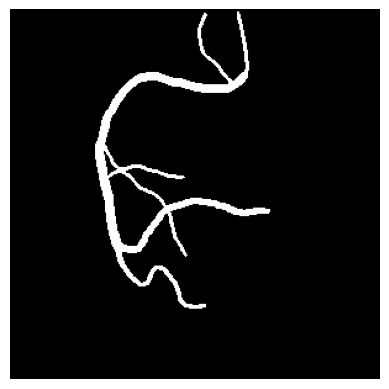

In [2]:
image_path = 'images/1_gt.pgm'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

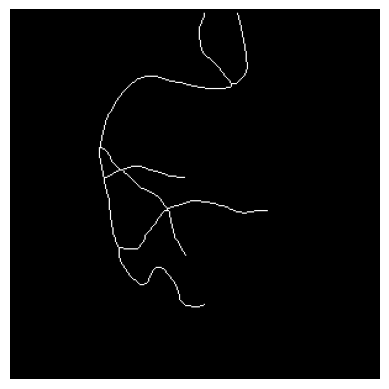

In [3]:
skeleton = skeletonize(binary_image)
plt.imshow(skeleton, cmap='gray')
plt.axis('off')
plt.show()

In [4]:

all_nodes_list = []
for i in range(1, skeleton.shape[0] - 1):
    for j in range(1, skeleton.shape[1] - 1):
        if skeleton[i, j]: all_nodes_list.append((i, j))

all_nodes_list = np.array(all_nodes_list)
all_nodes_list

array([[  3, 157],
       [  3, 184],
       [  4, 157],
       ...,
       [241, 151],
       [241, 152],
       [241, 153]])

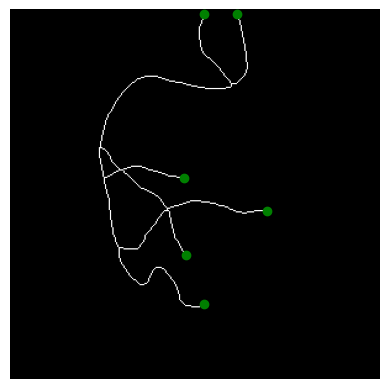

In [5]:
extreme_nodes_list = []
for i in range(1, skeleton.shape[0] - 1):
    for j in range(1, skeleton.shape[1] - 1):
        if skeleton[i, j]:
            if np.sum(skeleton[i-1:i+2, j-1:j+2]) == 2:
                extreme_nodes_list.append((i, j))


plt.imshow(skeleton, cmap='gray')
plt.plot([node[1] for node in extreme_nodes_list], [node[0] for node in extreme_nodes_list], 'go')
plt.axis('off')
plt.show()